## Importing the necessary Libraries

In [15]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Accessing the Dataset

In [16]:
#importing the dataset
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## Extraction of x and y from the Dataset

In [17]:
x =df.iloc[:,:-1].values
y =df.iloc[:,-1].values

print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


## Encoding the Data to perform operations 

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1,4,5])],remainder='passthrough')
x= np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


## Splitting x and y in to train and test set

In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=465)

## Creating the Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=65)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
rfr_score =(rfr.score(x_test,y_test))

## Calculating the parameters, namely : mse, rmse, r2square

In [22]:
predicted_y=rfr.predict(x)
import sklearn.metrics as met
mse = met.mean_squared_error(y,predicted_y)
rmse=np.sqrt(mse)
r2_score=met.r2_score(y,predicted_y)
print(mse)
print(rmse)
print(r2_score)

4718513.575612381
2172.2139801622634
0.9678011157526487


## Tabulation of the Actual and Predicted Insurance charges

In [23]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

          Actual     Predicted
0     8059.67910   7956.148802
1    38344.56600  39490.677153
2     3161.45400   3605.437697
3    11566.30055  11250.898829
4     6686.43130   7097.523952
..           ...           ...
129   2731.91220   3395.494667
130   2217.60120   3885.240233
131   5148.55260   6674.461445
132   4673.39220   4728.666492
133  21223.67580  25174.173018

[134 rows x 2 columns]


## Visualization of the Model with the help of a 3D Plot

<IPython.core.display.Javascript object>


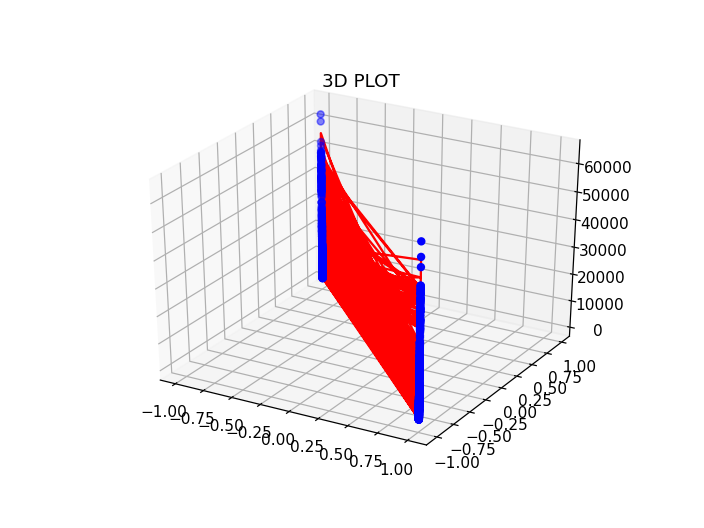

Text(0.5, 0.92, '3D PLOT')

In [24]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection ='3d')
ax.scatter(x[:,0],x[:,1],y,color ='blue')
ax.plot3D(x[:,0],x[:,1],predicted_y,color ='red')
ax.set_title('3D PLOT')


## Visualization of the model with the help of a 2D Plot (Bar Graph)

<IPython.core.display.Javascript object>


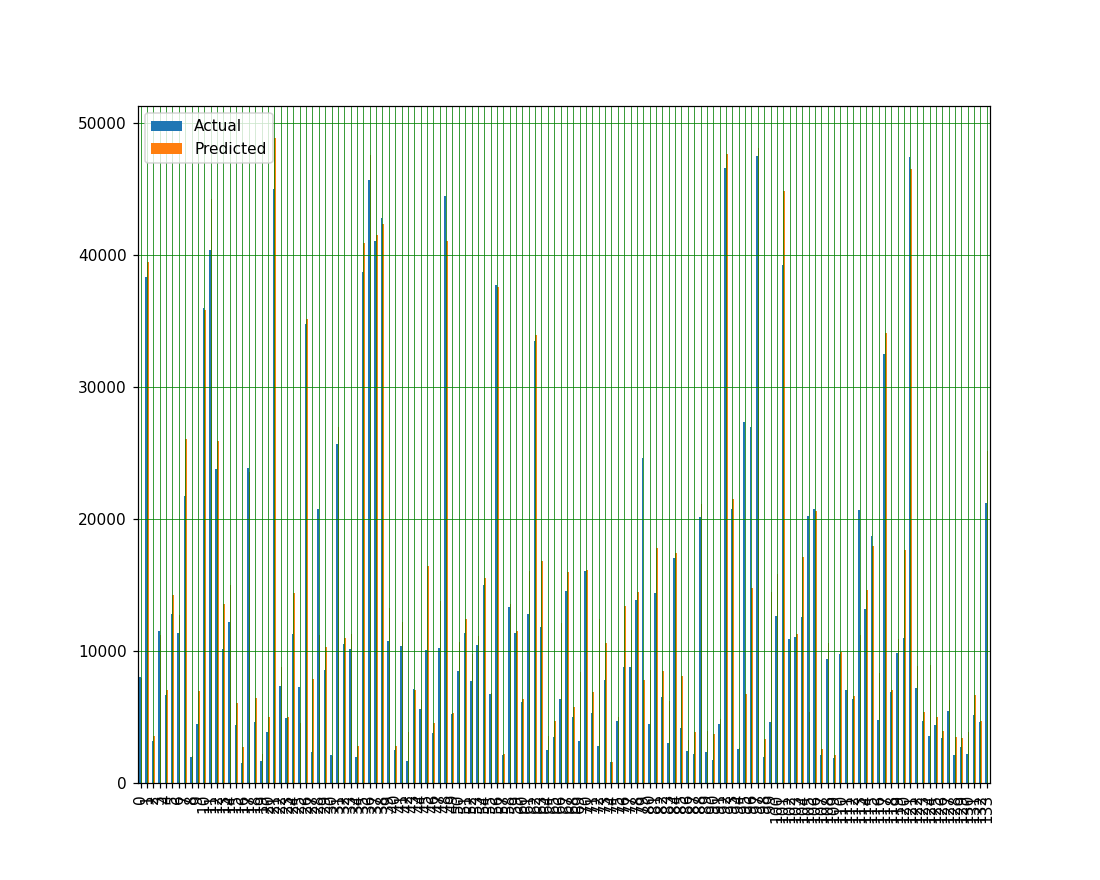

In [25]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='2.5',color='blue')
plt.show()

## Visualization of the model with the help of the Scatter Plot

<IPython.core.display.Javascript object>


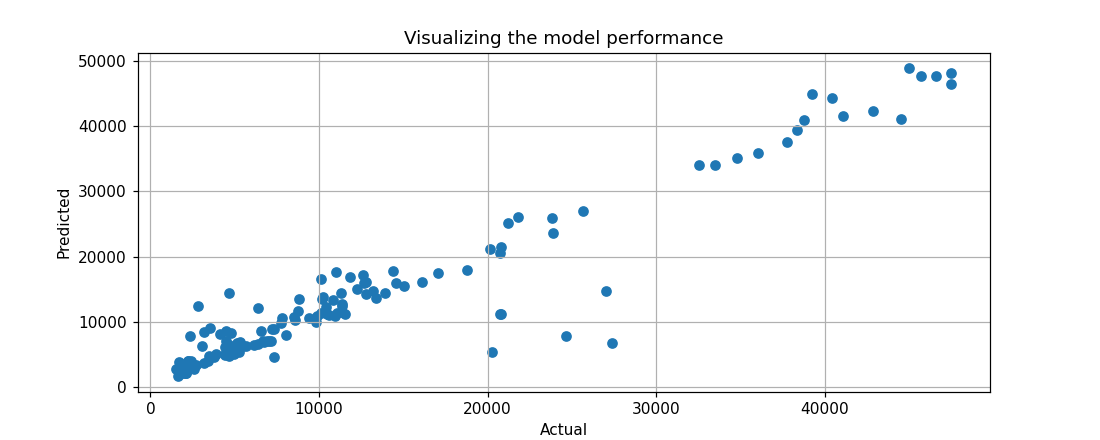

In [26]:

plt.figure(figsize=(10,4))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Visualizing the model performance')
plt.grid()